Mean accuracy for k=1: 0.9467
Mean accuracy for k=2: 0.9533
Mean accuracy for k=3: 0.9467
Mean accuracy for k=4: 0.9400
Mean accuracy for k=5: 0.9467
Mean accuracy for k=6: 0.9533
Mean accuracy for k=7: 0.9600
Mean accuracy for k=8: 0.9533
Mean accuracy for k=9: 0.9533
Mean accuracy for k=10: 0.9533
Mean accuracy for k=11: 0.9533
Mean accuracy for k=12: 0.9533
Mean accuracy for k=13: 0.9667
Mean accuracy for k=14: 0.9667
Mean accuracy for k=15: 0.9667
Mean accuracy for k=16: 0.9733
Mean accuracy for k=17: 0.9667
Mean accuracy for k=18: 0.9667
Mean accuracy for k=19: 0.9533
Mean accuracy for k=20: 0.9600


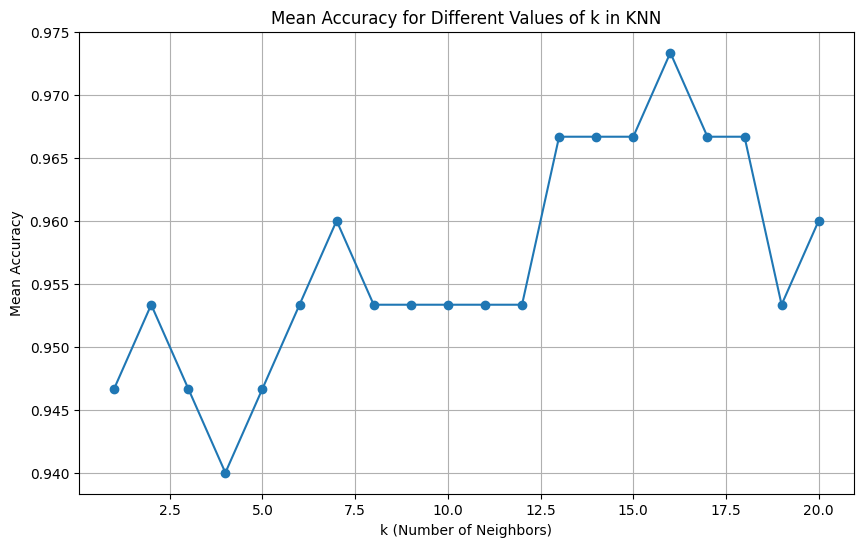

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Set up StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=50)

# Step 4: Try different values of k (from 1 to 20)
k_values = range(1, 21)
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []

    # Step 5: Perform stratified K-fold cross-validation
    for train_index, test_index in kf.split(X_normalized, y):
        X_train, X_test = X_normalized[train_index], X_normalized[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train and test the model
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Compute accuracy for this fold
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(fold_accuracy)

    # Compute the mean accuracy for the current value of k
    mean_accuracy = np.mean(fold_accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"Mean accuracy for k={k}: {mean_accuracy:.4f}")

# Step 6: Output the mean accuracy scores for each k
accuracy_results = pd.DataFrame({
    'k': k_values,
    'Mean Accuracy': mean_accuracies
})

# Display the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('Mean Accuracy for Different Values of k in KNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()
